In [2]:
from yty_manim.disposition.fonts_and_colors import *
from yty_manim.basic_unit.squ_tex import *
import math

Manim Community v0.18.0

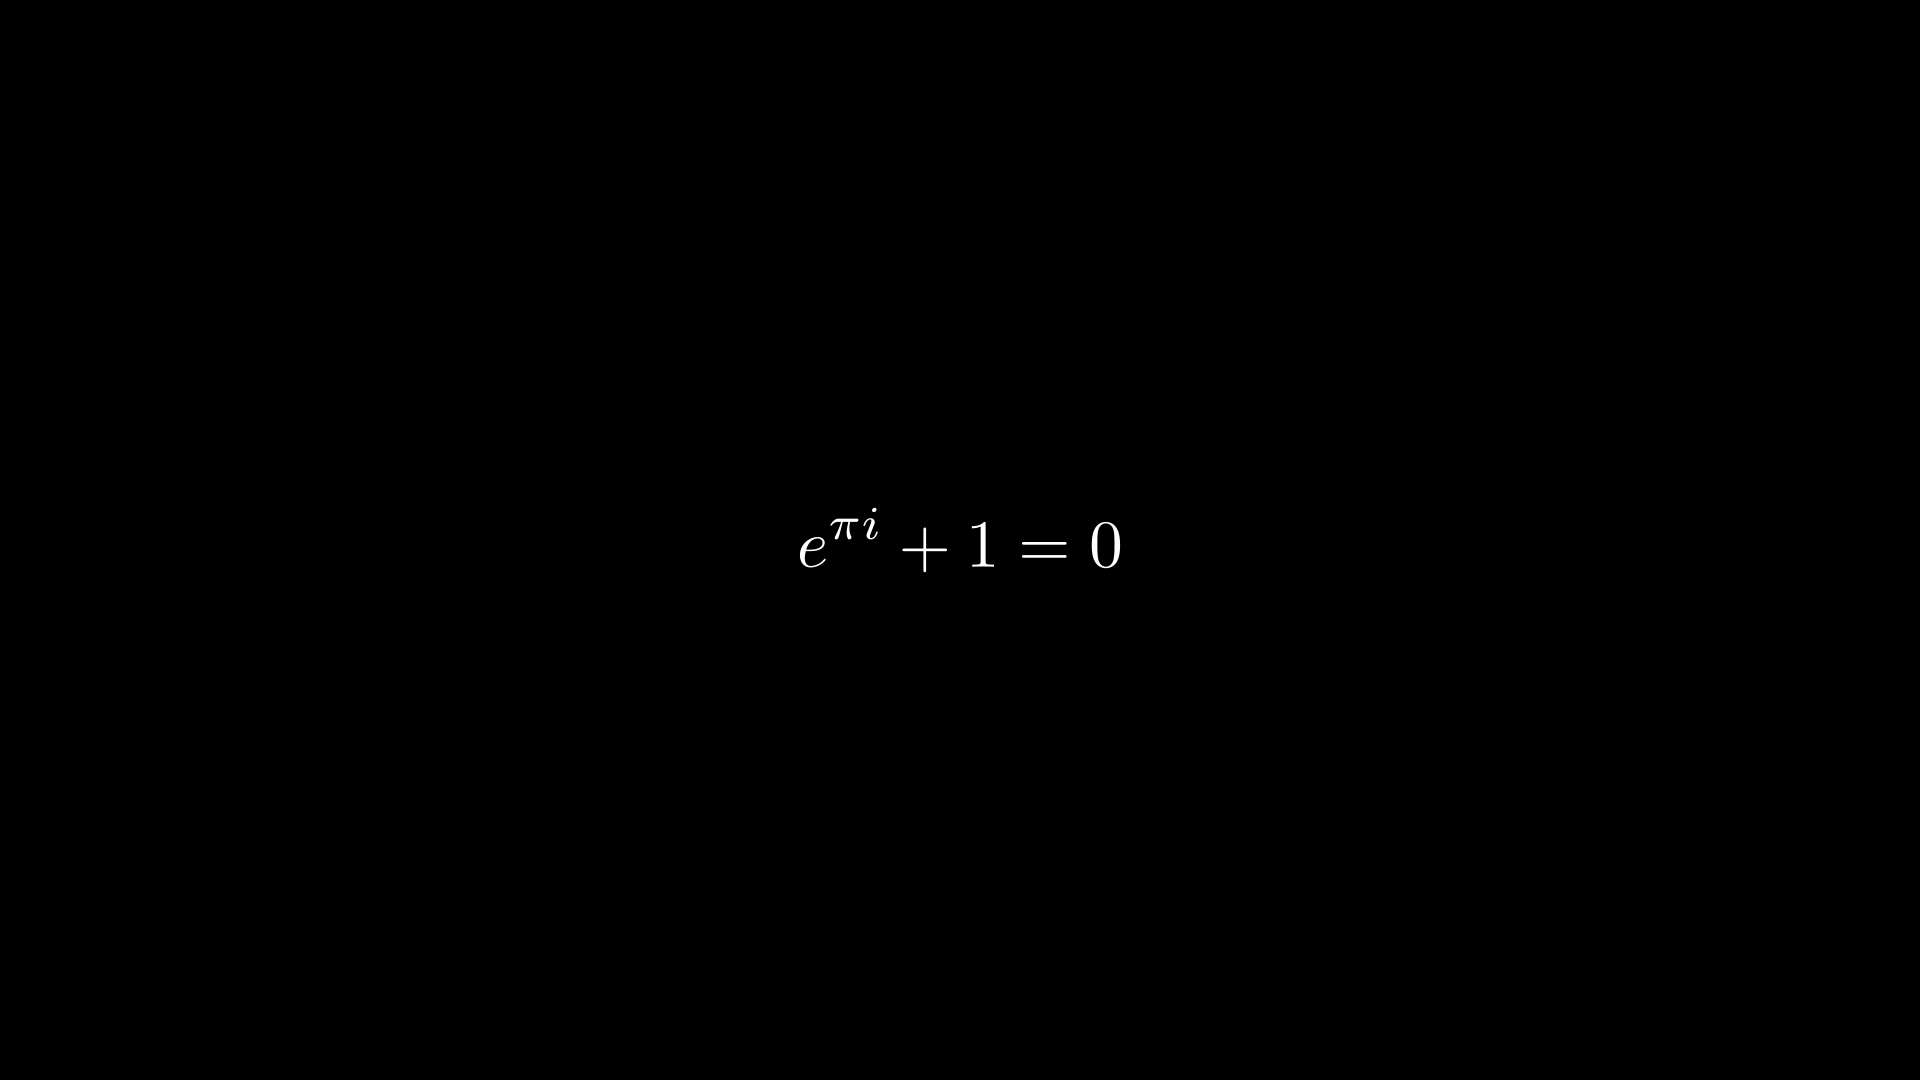

In [2]:
%%manim -qh -v WARNING Teach

rainbow_lst = [RED,ORANGE,YELLOW,GREEN,TEAL,BLUE,PURPLE]
string = "10101000111"

class Teach(Scene):
    def construct(self):
        s = Square().set_color(BLUE)
        # c = Circle().set_color(YELLOW)
        # t = Triangle().set_color(GREEN)
        # self.play(Create(s),run_time=2)
        # self.wait()
        # self.play(Transform(s,c))
        # self.wait()
        # self.play(Transform(s,t))
        # self.wait()
        # self.play(s.animate.shift(LEFT*2).rotate(PI/4).scale(2))
        # self.wait()
        # ---
        # for i in range(7):
        #     self.play(s.animate.set_color(rainbow_lst[i]),run_time=0.5)
        # ---
        # text = Text(string)
        # for i in range(len(string)):
        #     if string[i] == "1":
        #         text[i].set_color(GREEN)
        #     else:
        #         text[i].set_color(RED)
        # self.play(Write(text),run_time=2)
        # ---
        # t1 = Square(fill_opacity=0).set_color(WHITE).scale(1)
        # t2 = Text("yty♥wyx",font="Times New Roman").set_color_by_gradient(gradient_dict["Sunny_Morning"]).scale(2)
        # self.play(Create(t1))
        # # ♥ wyx
        # self.play(Transform(t1,t2))
        # self.wait()
        # ---
        elu = MathTex("e^{\pi{i}} + 1 = 0")
        self.add(elu)

In [3]:
%%manim -qh -v WARNING Title
class Title(Scene):
    def construct(self):
        text_lst = [
            "yty",
            "wyx",
            "♥",
            "love",
        ]
        v = VGroup()
        for _ in text_lst:
            v.add(Text(_,font="Times New Roman").set_color(BLUE))
            
        self.play(Write(v),run_time=2)
        self.play(v.animate.arrange(direction=DOWN, buff=0.5))
        self.wait()
        center = v.get_center()
        center_0 = v[0].get_center()
        animate_group = []
        for i in range(len(text_lst)):
            animate_group.append(
                v[i].animate.set_color(BLUE).shift(center-center_0)
                if i == 0 else
                v[i].animate.shift(center-center_0).set_color(GRAY_B).scale(5/6)
            )
        self.play(
            *animate_group,
            run_time=2
        )
        self.wait()
        
        for j in range(0,3):
            animate_group_2 = []
            for i in range(len(text_lst)):
                animate_group_2.append(
                    v[i].animate.to_edge(UL)
                    if i in [j] else
                    FadeOut(v[i],shift=DOWN)
                )
            self.play(
                *animate_group_2,
                run_time=2
            )
            self.wait()
            
            animate_group_3 = []
            for i in range(len(text_lst)):
                animate_group_3.append(
                    v[i].animate.move_to(center)
                    if i in [j] else
                    FadeIn(v[i],shift=UP)
                )
            self.play(
                *animate_group_3,
                run_time=2
            )
            self.wait()
            
            center_1 = v[j+1].get_center()
            animate_group_4 = []
            for i in range(len(text_lst)):
                if i == j:
                    animate_group_4.append(v[i].animate.set_color(GRAY_B).shift(center-center_1))
                elif i == j + 1:
                    animate_group_4.append(v[i].animate.set_color(BLUE).scale(6/5).shift(center-center_1))
                else:
                    animate_group_4.append(v[i].animate.shift(center-center_1))
            self.play(
                *animate_group_4,
                run_time=2
            )
            self.wait()
        

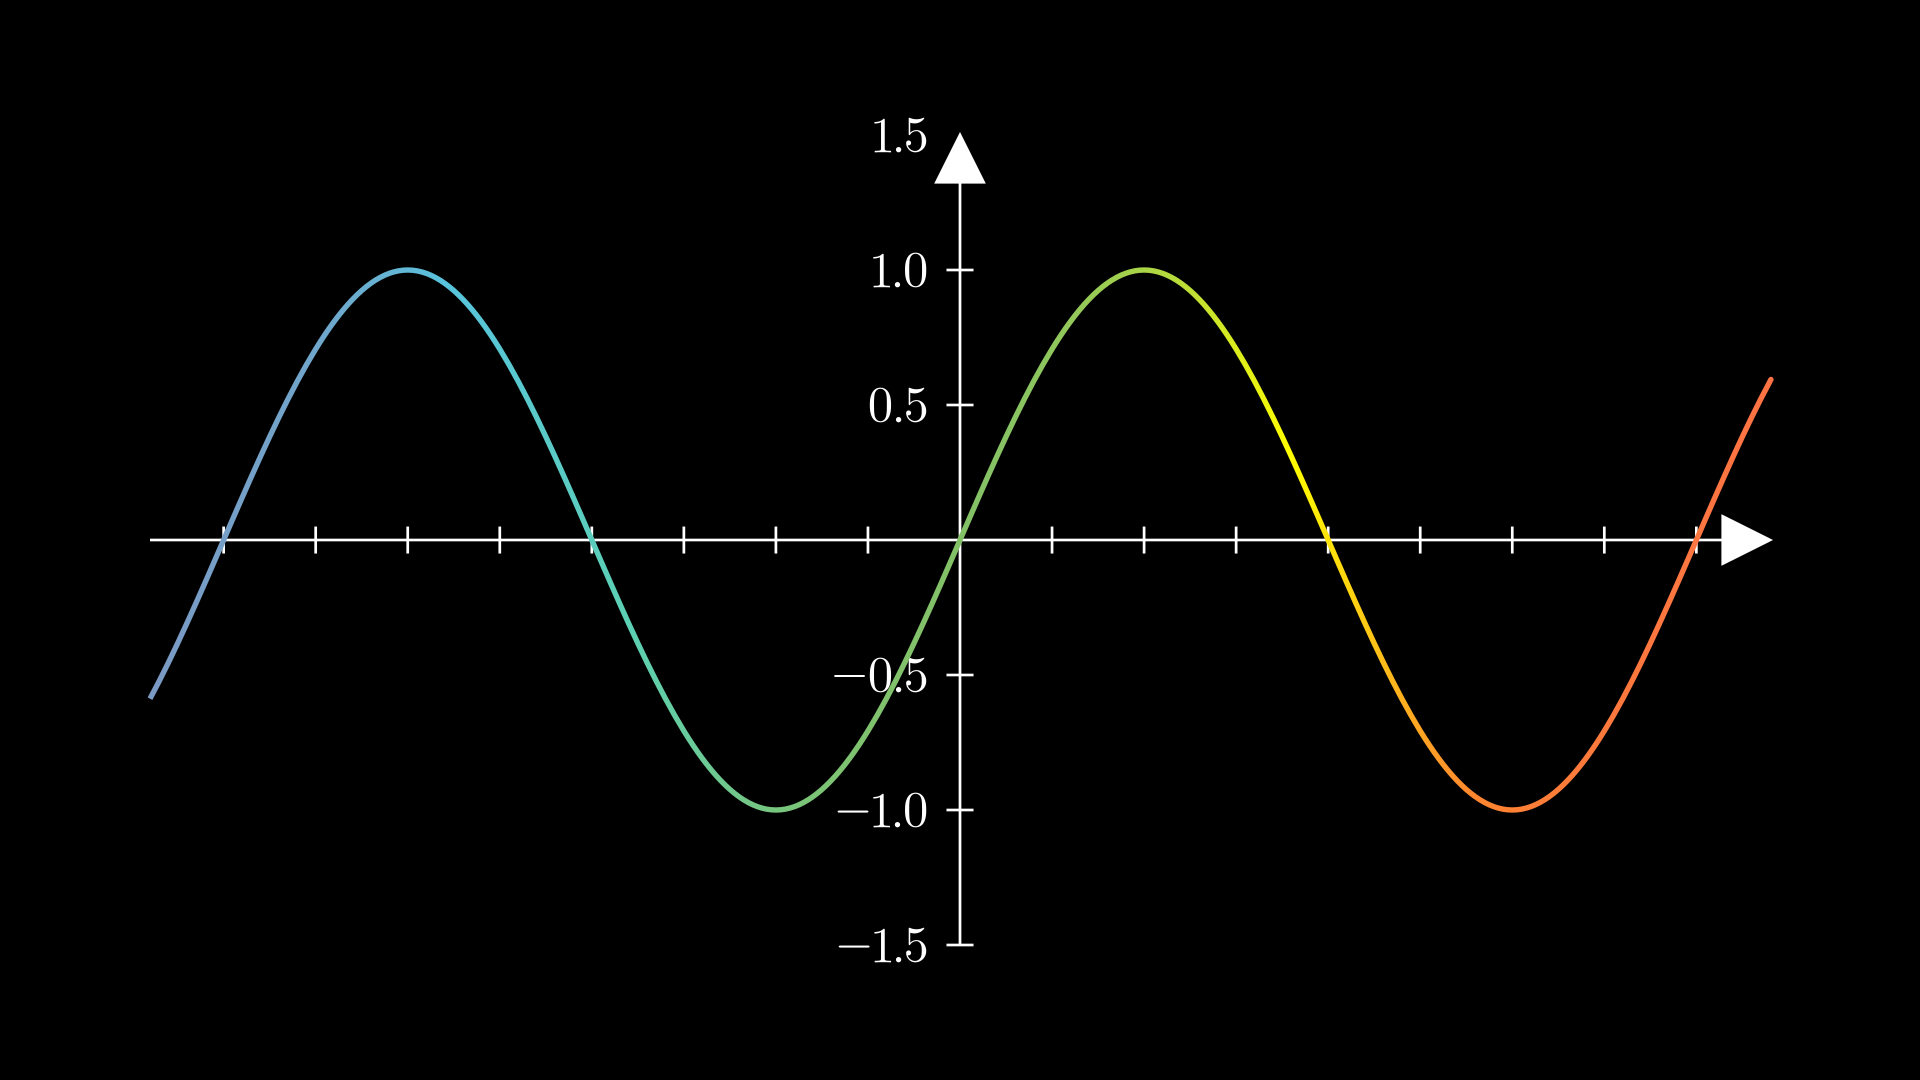

In [29]:
%%manim -qh -v WARNING Axe
class Axe(Scene):
    def construct(self):
        # 定义坐标系
        axes = Axes(
            x_range=[-2.2*np.pi,2.2*np.pi,0.25*np.pi],
            y_range=[-1.5, 1.5, 0.5],
            axis_config={
                "color": WHITE,
            },
            y_axis_config={
                "numbers_to_include": np.arange(-1.5, 1.6, 0.5),
                "label_direction": LEFT,
            }
        )
        
        normal_func = axes.plot(
            lambda x: np.sin(x),
        ).set_color_by_gradient(gradient_dict["rainbow_color"])
        
        self.add(axes, normal_func)

In [58]:
%%manim -qh -v WARNING Axen
class Axen(Scene):
    def construct(self):
        # 定义坐标系
        axes = Axes(
            x_range=[-2.2*np.pi,2.2*np.pi,0.25*np.pi],
            y_range=[-1.5, 1.5, 0.5],
            axis_config={
                "color": WHITE,
            },
            y_axis_config={
                "numbers_to_include": np.arange(-1.5, 1.6, 0.5),
                "label_direction": LEFT,
            }
        ).shift(UP*0.5)
        
        sin_func = axes.plot(
            lambda x: np.sin(x),
        ).set_color(GRAY_B)
        self.add(axes, sin_func)
        
        normal_func = axes.plot(
            lambda x: x,
        )
        
        t = Text("n = 0").to_edge(DOWN).scale(0.75)
        
        self.add(normal_func)
        
        for n in range(1, 8):
            normal_func_change = axes.plot(
                lambda x: sum([((-1)**k) * (x**(2*k+1)) / math.factorial(2*k+1) for k in range(n)]),
            ).set_color(gradient_dict["rainbow_color"][n-1])
            
            t_change = Text("n = " + str(n)).to_edge(DOWN).scale(0.75)
            
            self.play(
                Transform(normal_func, normal_func_change),
                Transform(t, t_change),
                run_time=1,
            )

            self.wait()
        


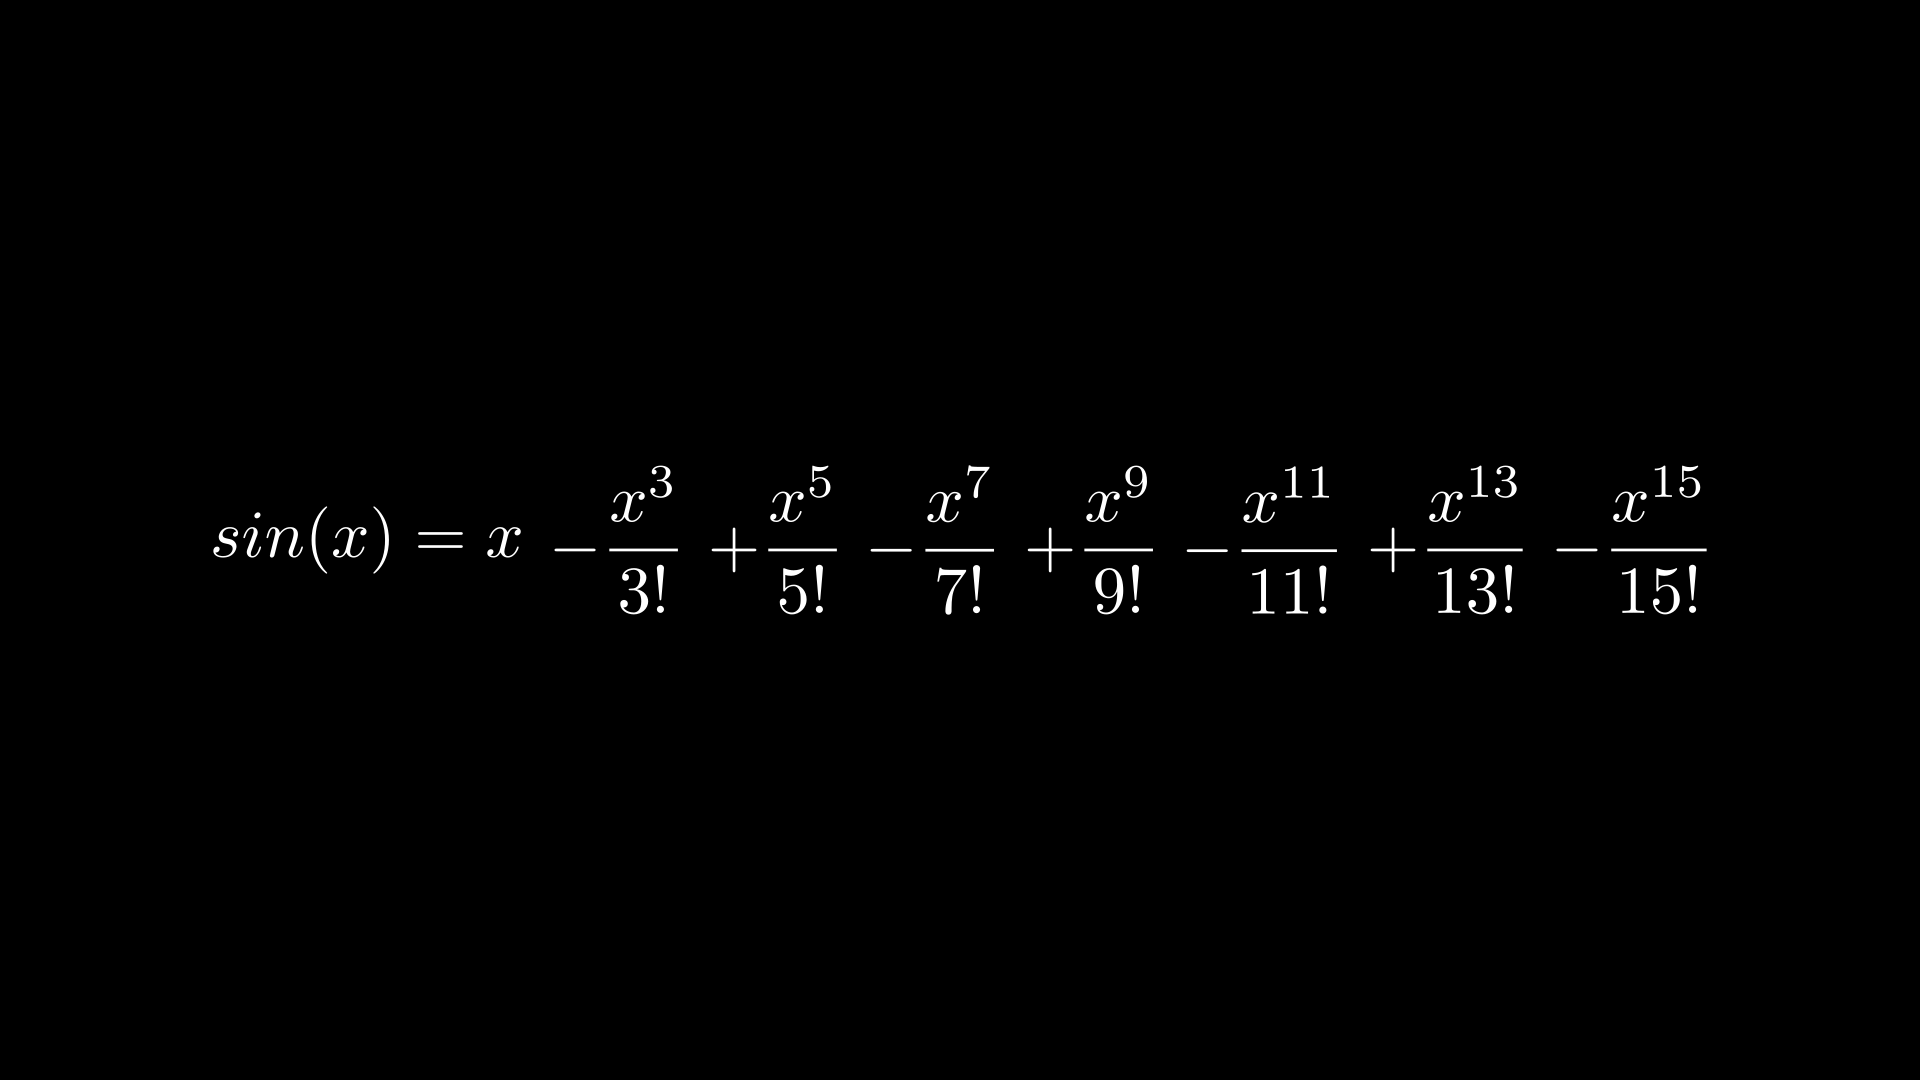

In [42]:
%%manim -qh -v WARNING RainbowAxe
class RainbowAxe(Scene):
    def construct(self):
        a = MathTex("sin(x) = x")
        v = VGroup(a)
        for n in range(1,8):
            s = MathTex(
                f"+ \\frac{{x^{{{2*n+1}}}}}{{{(2*n+1)}!}}"
                if n % 2 == 0 else
                f"- \\frac{{x^{{{2*n+1}}}}}{{{(2*n+1)}!}}"
            )
            v.set_z_index()
            v.add(s)
            v.arrange()
        self.add(v)
       